# Linear Regression

## Geely Automotive Pricing Model

### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.


They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

-  Which variables are significant in predicting the price of a car
-  How well those variables describe the price of a car
<br>Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

### Business Goal

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.
<br>**So interpretation is important!**
<br>Further, the model will be a good way for management to understand the pricing dynamics of a new market.

Steps to follow:
- Reading, understanding and visualising the data.
- Preparing the data for modeling (train-test split, rescalling etc)
- Training the model
- Residual analysis
- Predictions and evaluation on the test set

### Importing the library packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np,pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


###  Reading csv data

In [3]:
df=pd.read_csv("CarPrice_Assignment.csv")

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Inspecting the dataframe

In [5]:
df.shape

(205, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Sanity checks on missing values

In [9]:
# Checking the percentage of missing values in all columns
round(df.isnull().sum()/len(df.index),2)*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [10]:
#Dropping duplicate rows
df=df.drop_duplicates()

In [11]:
#Let's drop "car_ID" column since it's not relevent for our modelling
df.drop("car_ID",axis=1, inplace=True)

## Data Analysis

### Data understanding using visualization

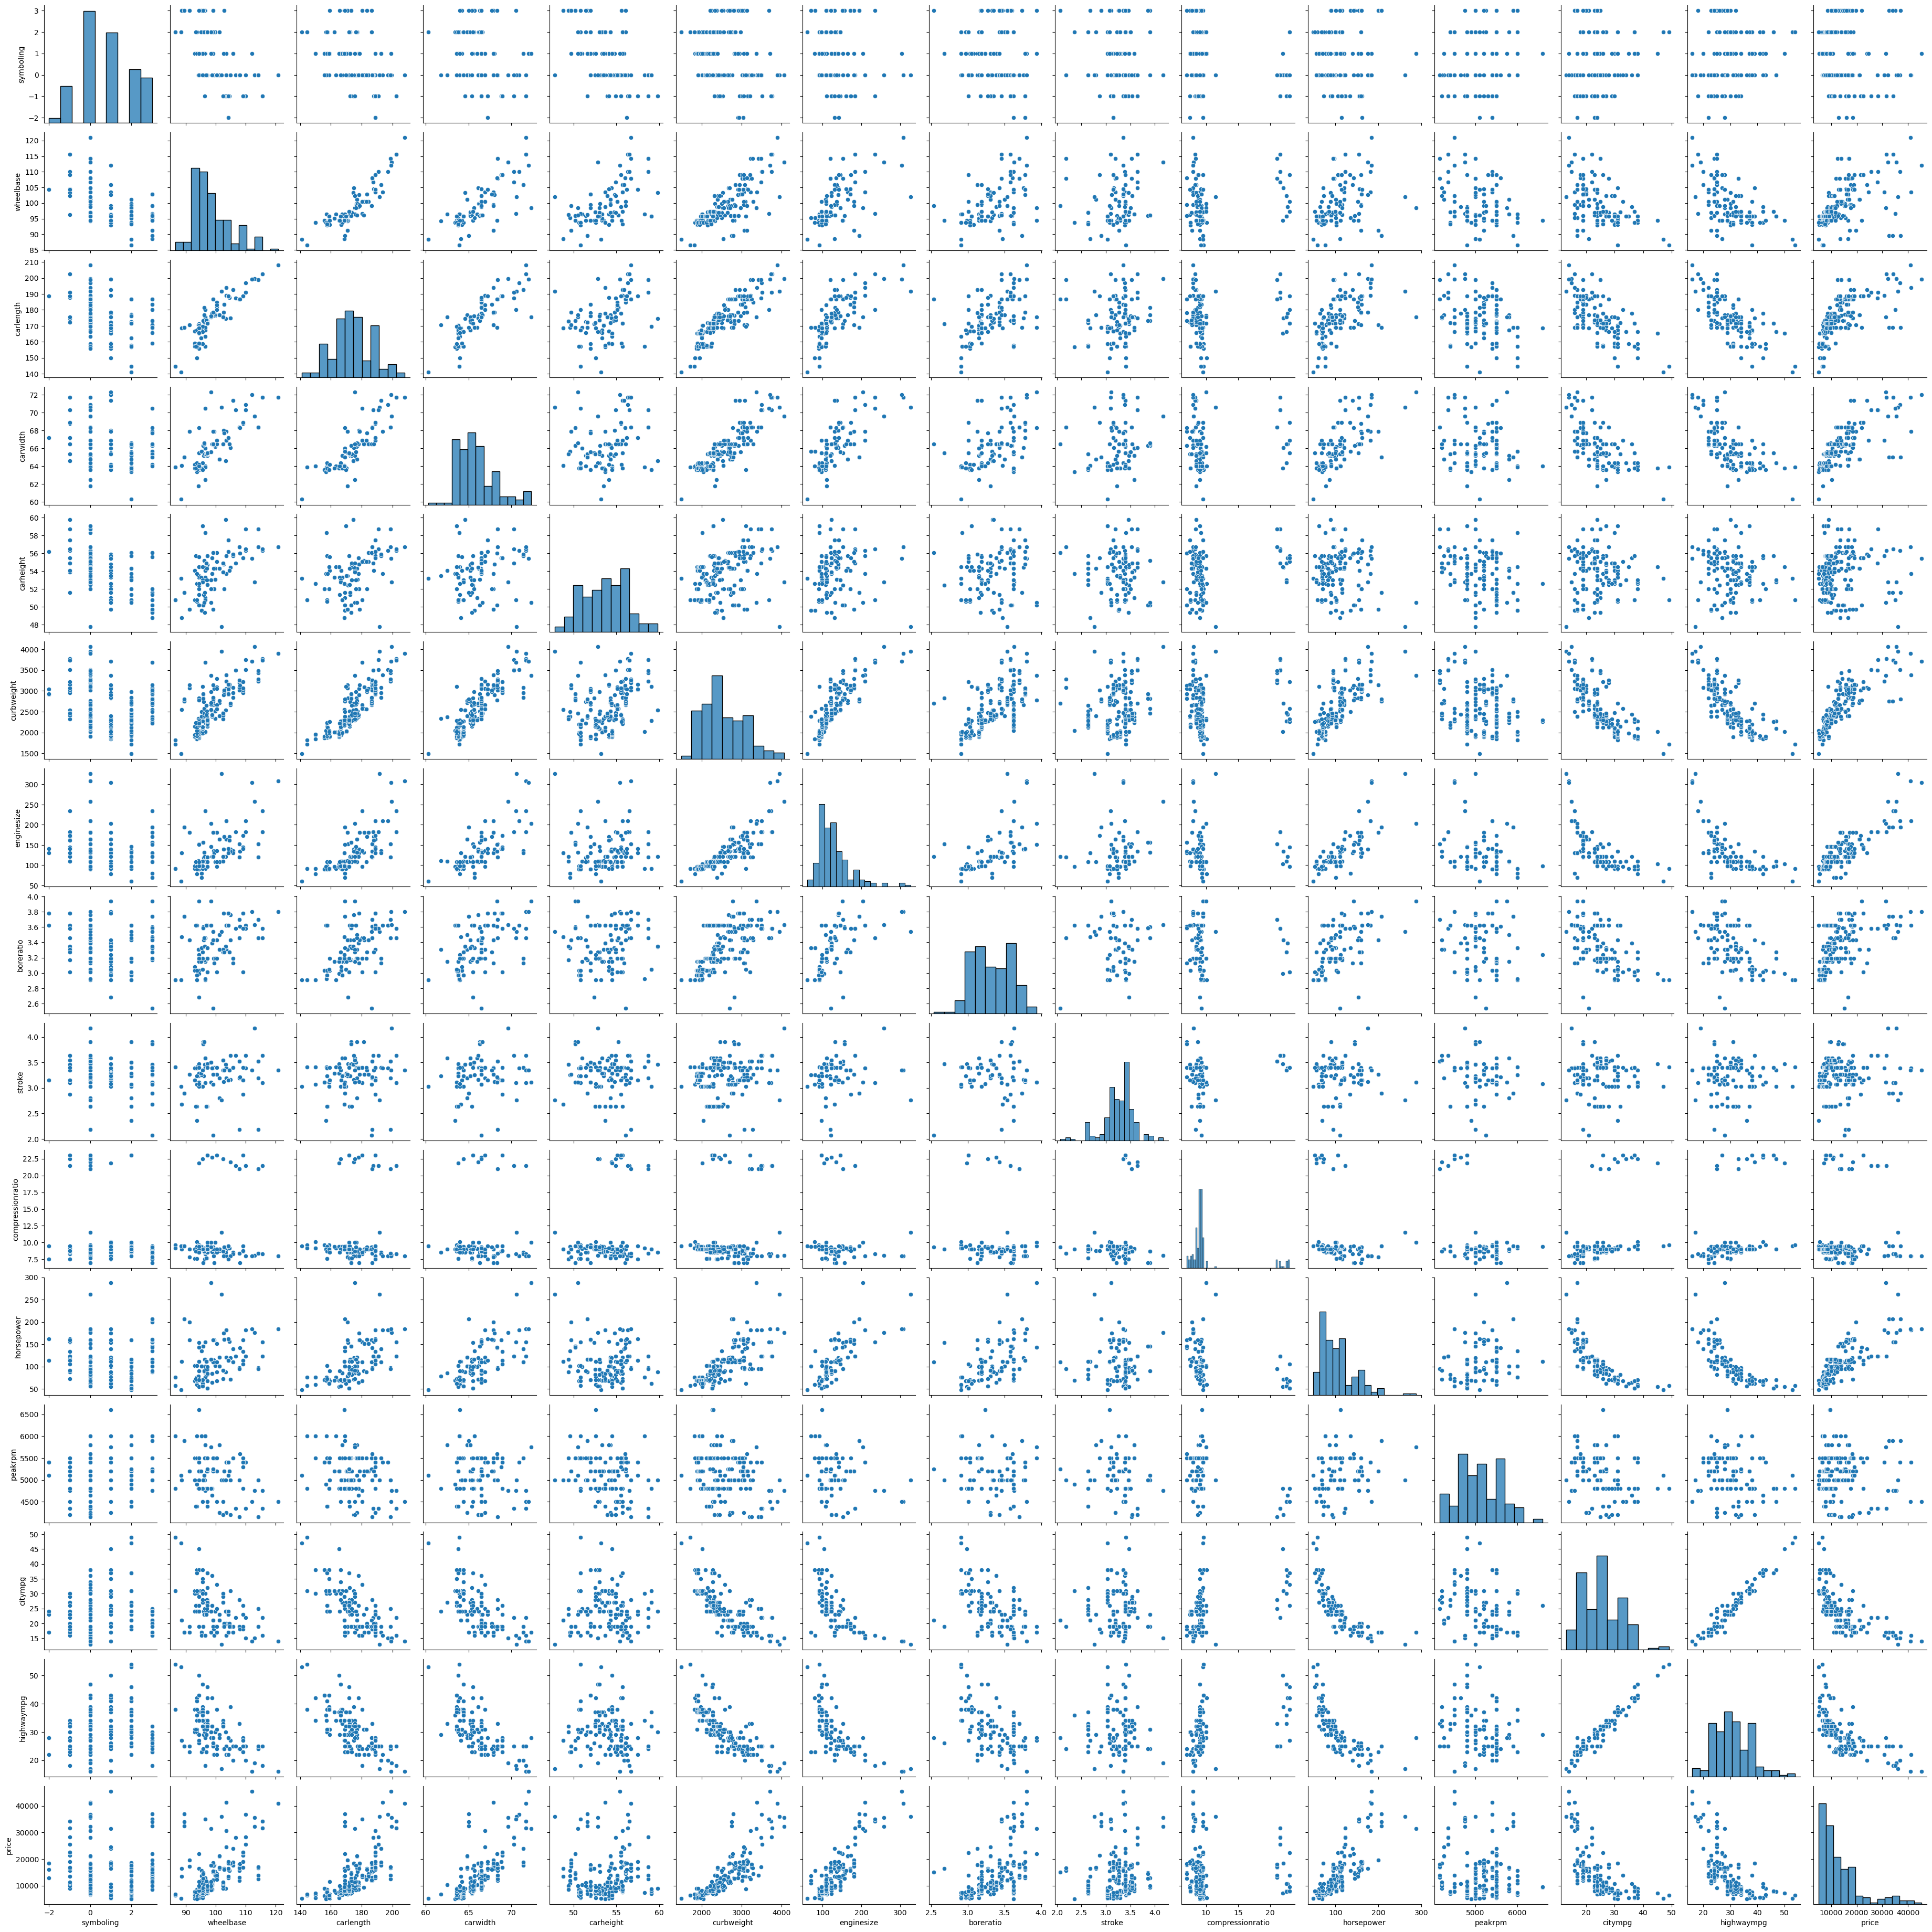

In [12]:
#Plotting pairplot and heatmap to find relationship between them where variables can be continuous or categorical.
sns.pairplot(df)
plt.show()

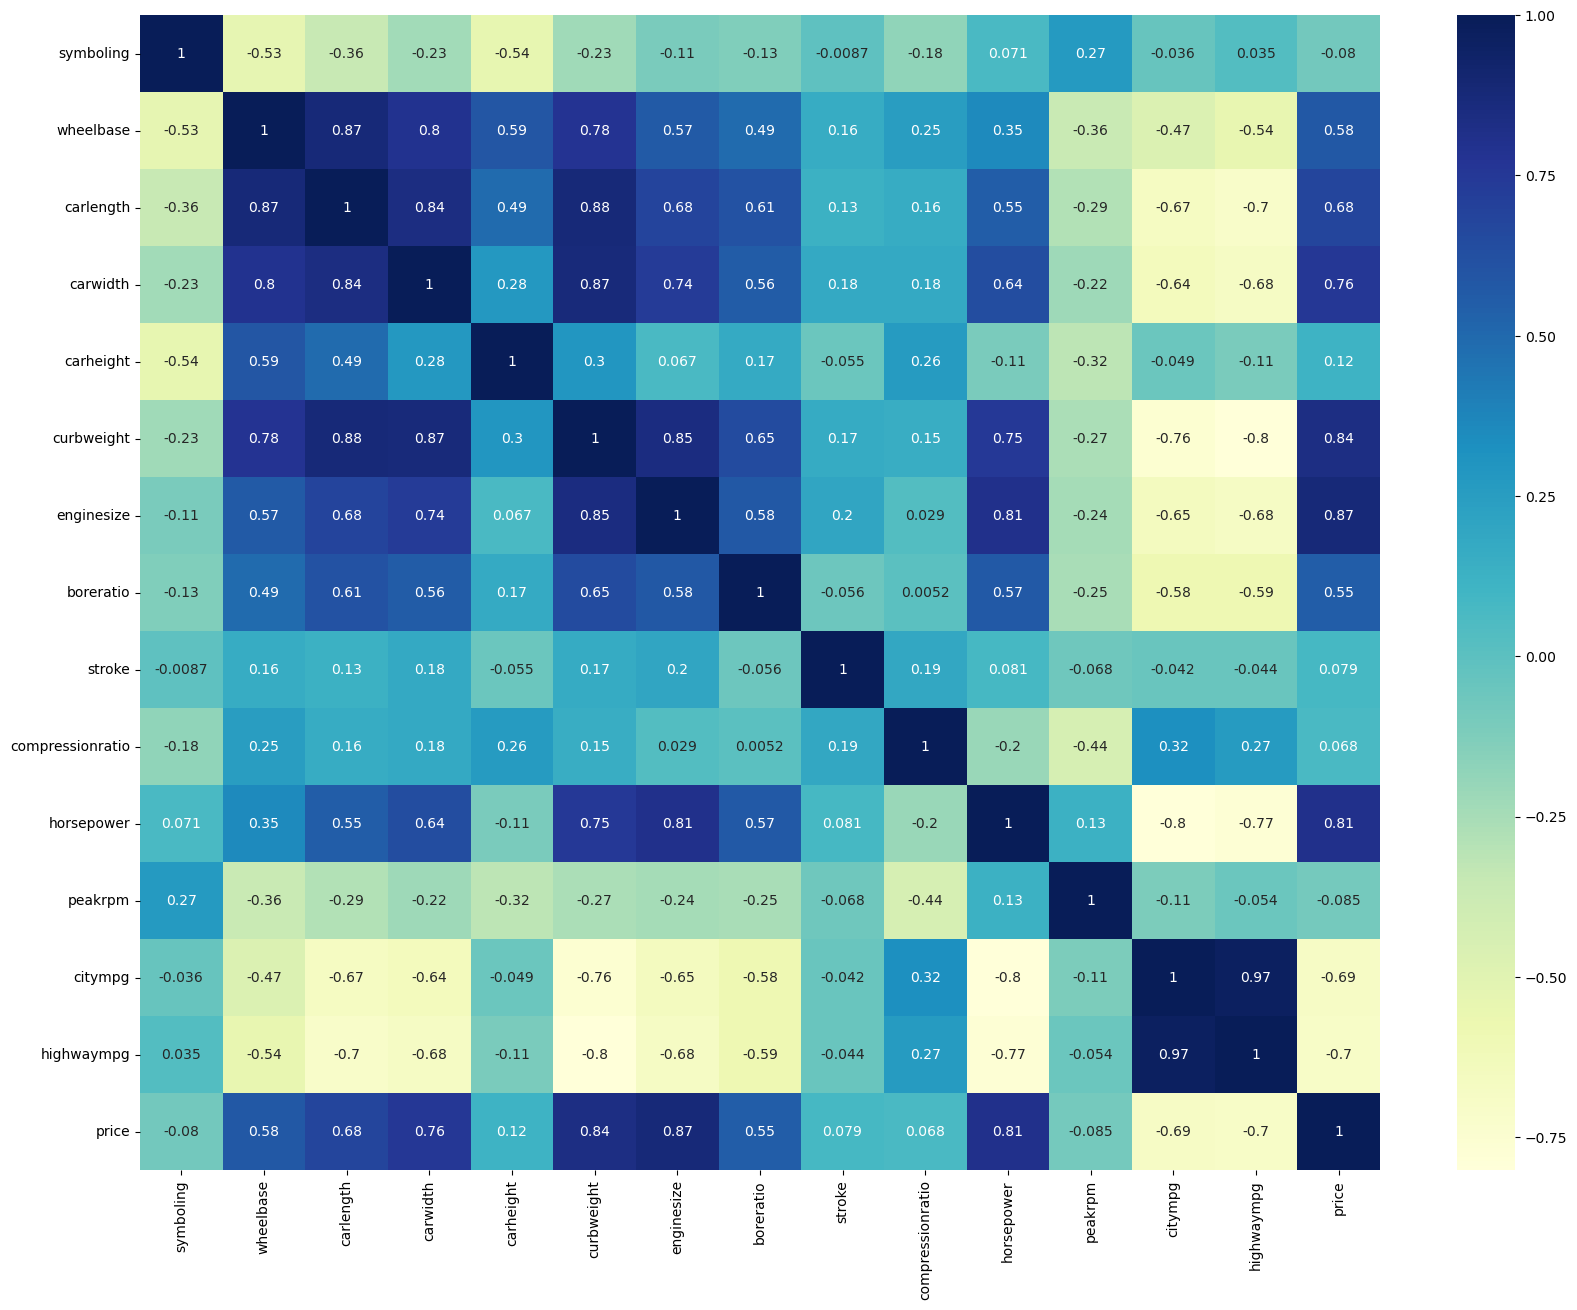

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

#### Here the dependent variable is price and it has positive relationship with some features.These features are wheelbase, carlength, carwidth, curbweight,enginesize,boreratio, horsepower. Negative relationship with few features like citympg, highwaympg
#### There is Multicollinearity among independent variables like carlength, wheelbase, carwidth, curbweight, enginesize, horsepower, dimensions of car. 
#### Highwaympg and citympg are highly correlated.


#### We have inferred relationship among numerical data. Now Let's look at Categorical variables.
#### Let's look at Symboling. It is said to be assigned insurance risk rating.  In the dataset it is in int64 type, +3 value showa that auto is risky, -3 is said to be safe. So,let's categorize the values into 
#### negative values as safe,  0,1 as moderate,  2,3 as risky

In [14]:
#Checking the unique values in symboling
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [15]:
df['symboling']=df['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

#### The next categorical variable is CarName

In [16]:
#CarName has two parts.1st part is name of car company, 2nd part is car model.
df['CarName'].head()

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: CarName, dtype: object

#### Car company name is sufficient for model building as car model name is not needed.

In [17]:
#Creating a column named car company from the variable car name
df['car_company'] = df['CarName'].apply(lambda x: x.split( )[0])
df.drop('CarName',axis=1,inplace=True)

In [18]:
#checking the unique values again
df['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### There are multiple companies names mispelled. Let's correct it.

In [19]:
df['car_company'].replace('maxda','mazda',inplace=True)
df['car_company'].replace('Nissan','nissan',inplace=True)
df['car_company'].replace('porcshce','porsche',inplace=True)
df['car_company'].replace('toyouta','toyota',inplace=True)
df['car_company'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

In [20]:
#Creating list of categorical variables
categorical_variables = list(df.columns[df.dtypes == 'object'])
categorical_variables

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'car_company']

#### Creating custom functions for plotting

In [21]:
#Function to plot percentages
def plot_percentages(dataframe, var_list, sortbyindex=False):
    plt.figure(figsize=(20, 17))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        values = (dataframe[var].value_counts(normalize=True)*100)
        if sortbyindex:
                values = values.sort_index()
        ax = values.plot.bar(color=sns.color_palette('deep', 16))
        ax.set_ylabel('% in dataset', fontsize=16)
        ax.set_xlabel(var, fontsize=10)
        showLabels(ax)

In [22]:
#Show labels in bar plots - copied from https://stackoverflow.com/a/48372659 and edited
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks()
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)

        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

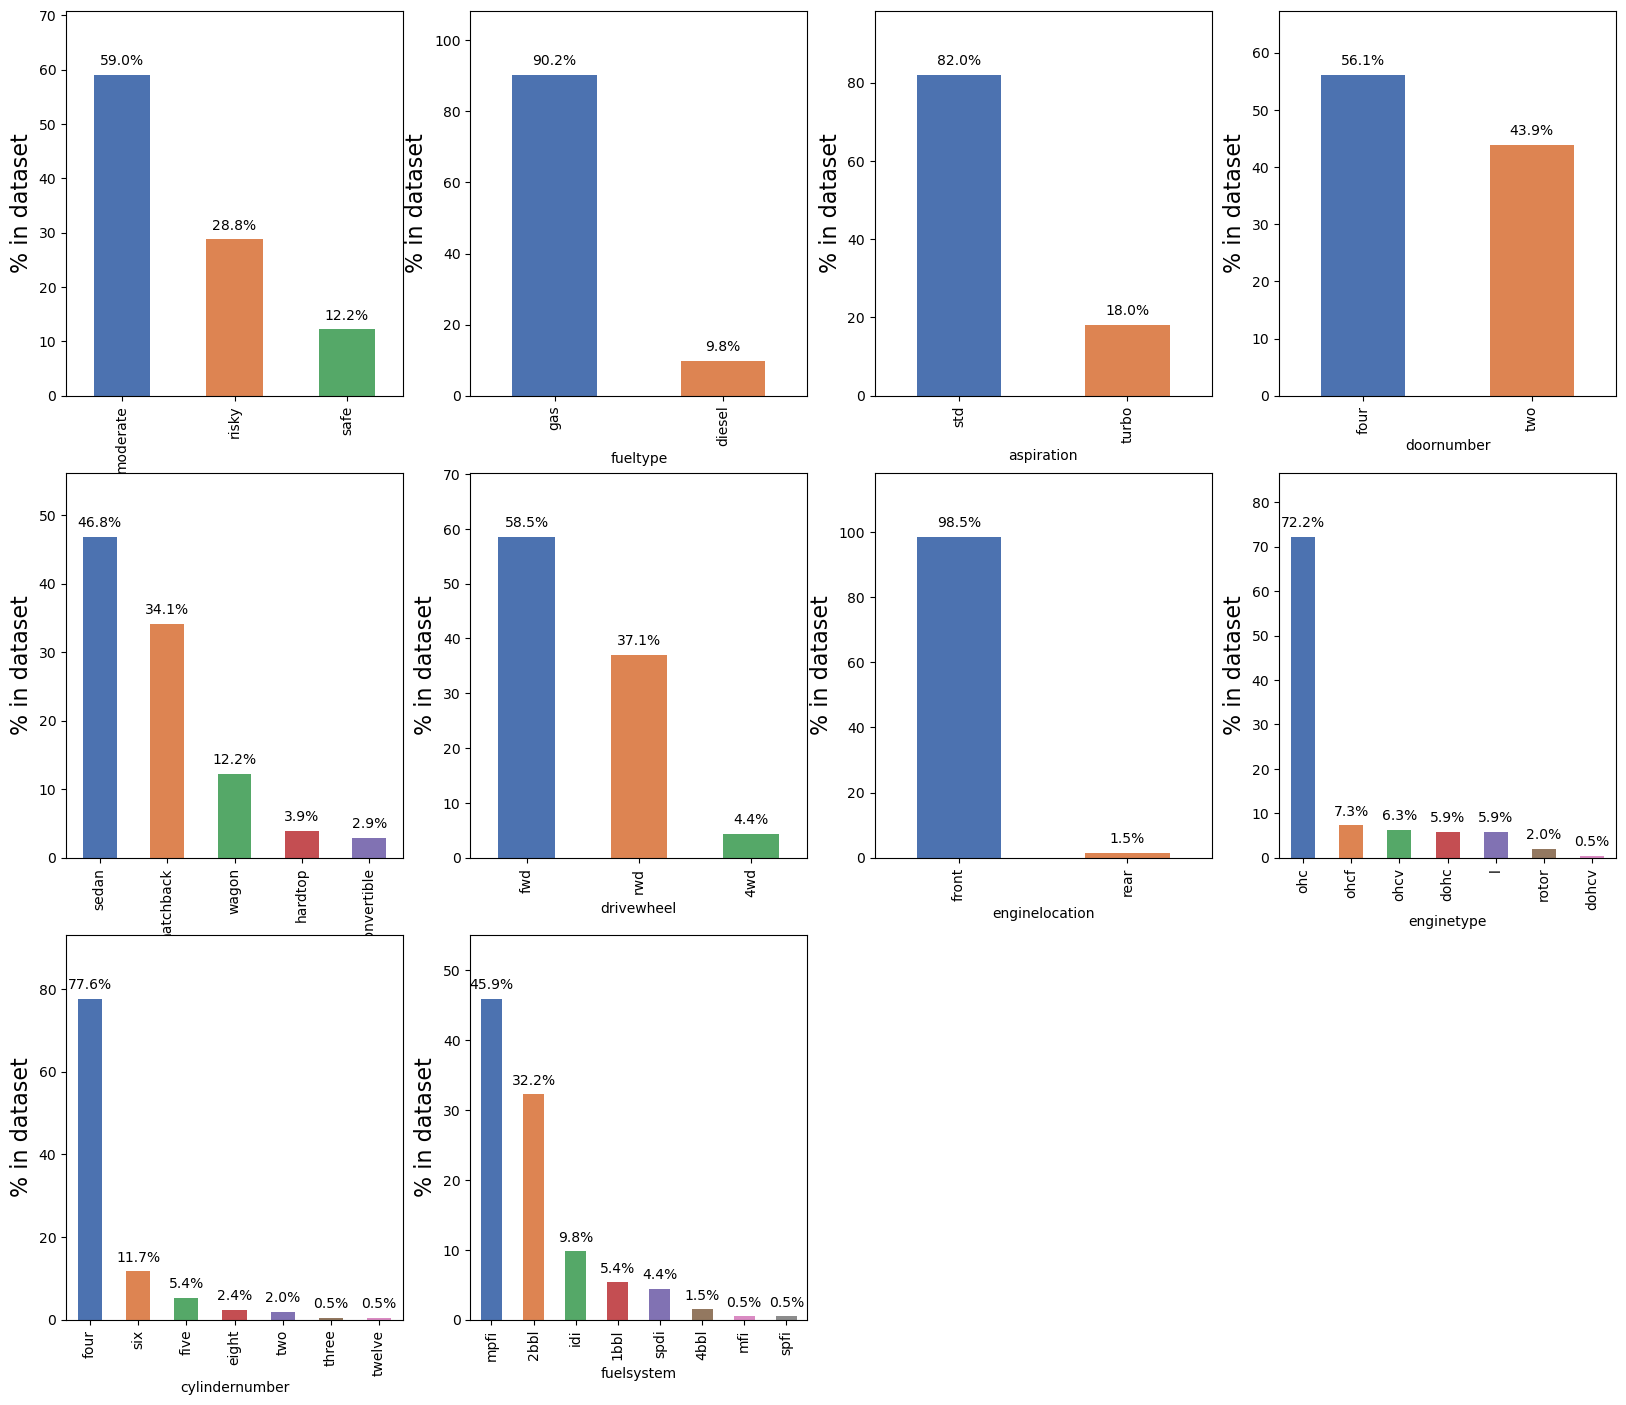

In [23]:
plot_percentages(df,categorical_variables[:-1])

#### It is clearly seen that some of car features are predominant in US automobile market. Geely Automotives have to consider these features for market needs and the changes they have to make.
#### Features that are predominant are
#### moderate in symboling
#### Sedan in carbody
#### gas in fueltype
#### standard in aspiration
#### four in doornumbers
#### forward in drivewheel
#### front in engine location
#### ohc in engine type
#### four in cylindernumber
#### mpfi in fuelsystem


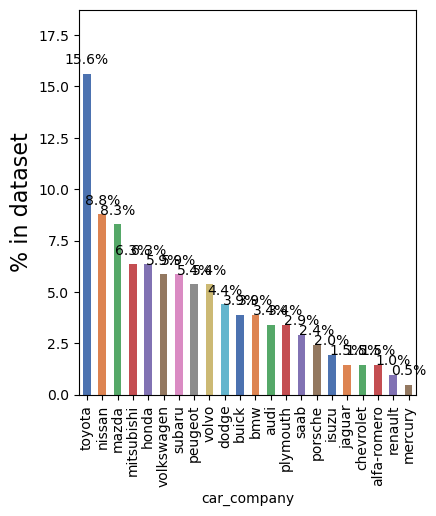

In [24]:
#Percentage of Popular car companies in US automobile market
plot_percentages(df,[categorical_variables[-1]])

It is inferred from the above graph that toyota has highest percentage in the market with 15.6%, Then Nissan with 8.8%, Mazda with 8.3%, Mitsubishi and Honda with 6.3%

Now relating the categorical variable with target variable price

In [25]:
#Function to plot a list of categorical variables together
def plot_cat(var_list):
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        sns.boxplot(x = var, y = 'price', data = df)
    plt.show()

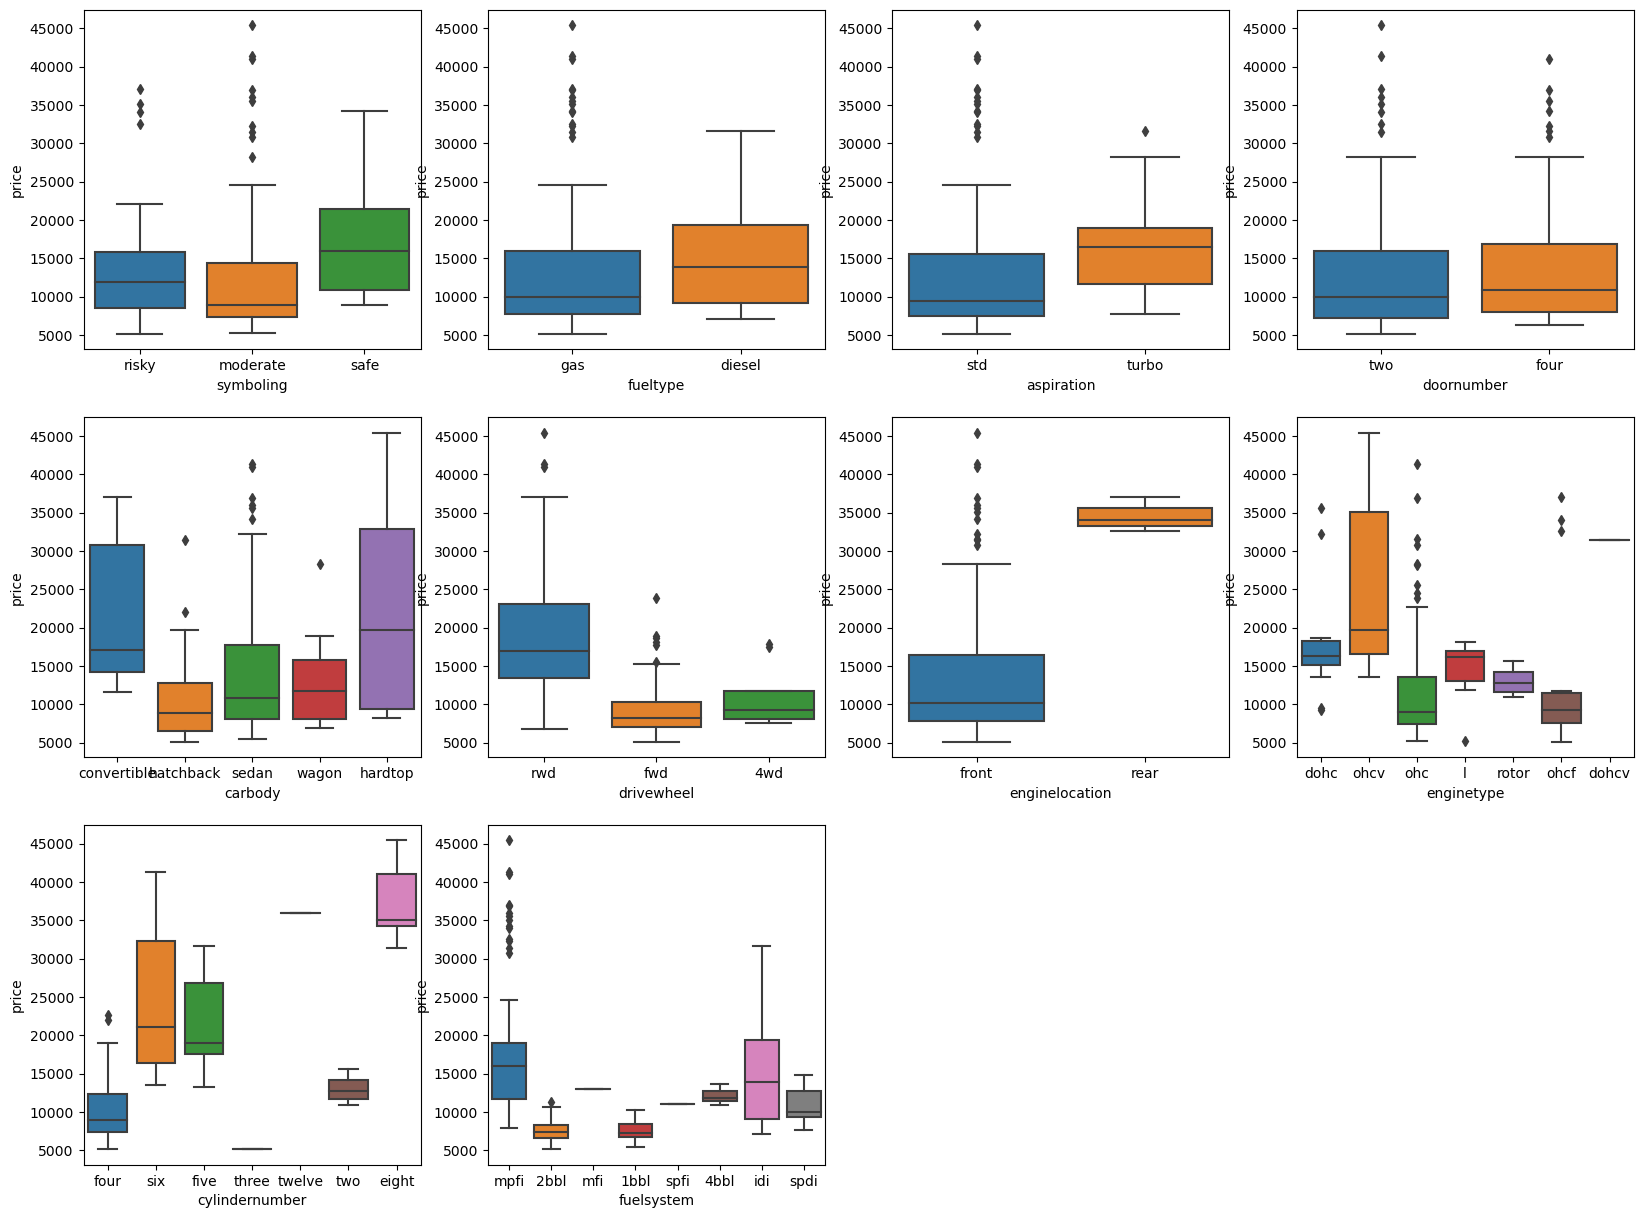

In [26]:
# ploting all categorical variables against the target variable
plot_cat(categorical_variables[:-1])

We have observed few features reacting positively for price variable.
-Aspiration and enginelocation has visible affect on pricing of car.
-Coming to carbody,convertible and hardtop are priced higher than other types.
-Rear wheel drive costs higher than other drivewheel.
-ohcv enginetype has higher price.
-Cylindernumber has effect on pricing too.

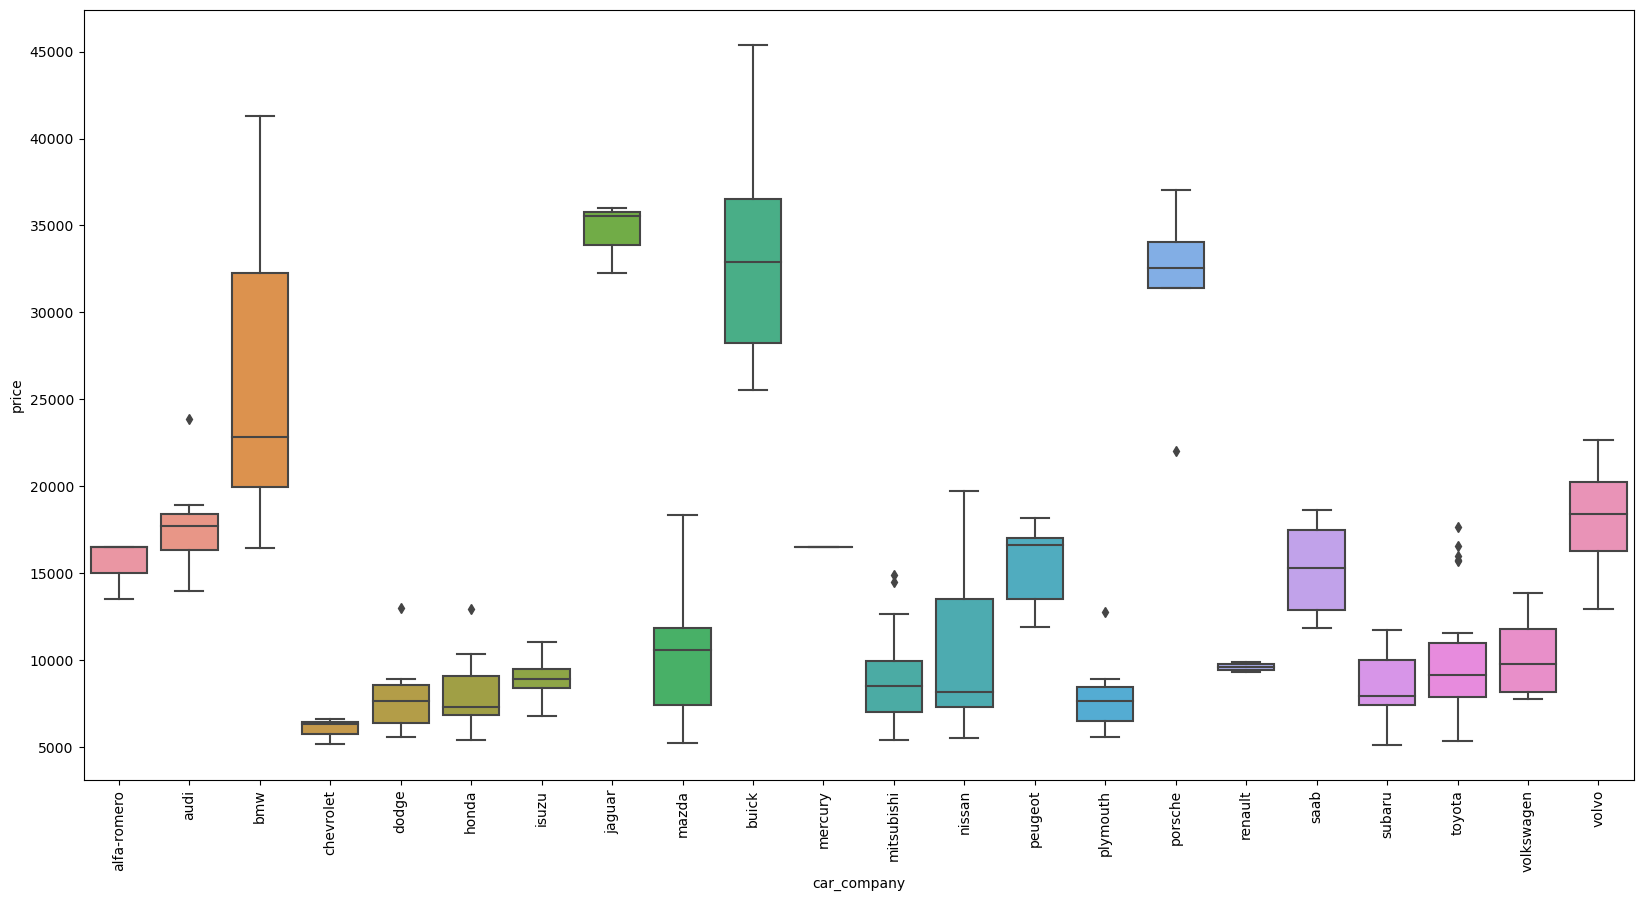

Average US car price:  13276.710570731706
car_company
jaguar     34600.000000
buick      33647.000000
porsche    31400.500000
bmw        26118.750000
volvo      18063.181818
Name: price, dtype: float64


In [27]:
#Relating price variable with car companies
plt.figure(figsize=(20,10))
sns.boxplot(x = categorical_variables[-1], y = 'price', data = df)
plt.xticks(rotation=90)
plt.show()
print('Average US car price: ',df['price'].mean())
print(df.groupby('car_company').price.mean().sort_values(ascending=False).head())

Car manufacturers like Jaguar, Buick, Porche, BMW, Volvo are on high end side with average price of $13,000 approx.
There are few outliers which shows that they are priced on their usual pricing range.


#### Relating multiple categorical variables against price variable.

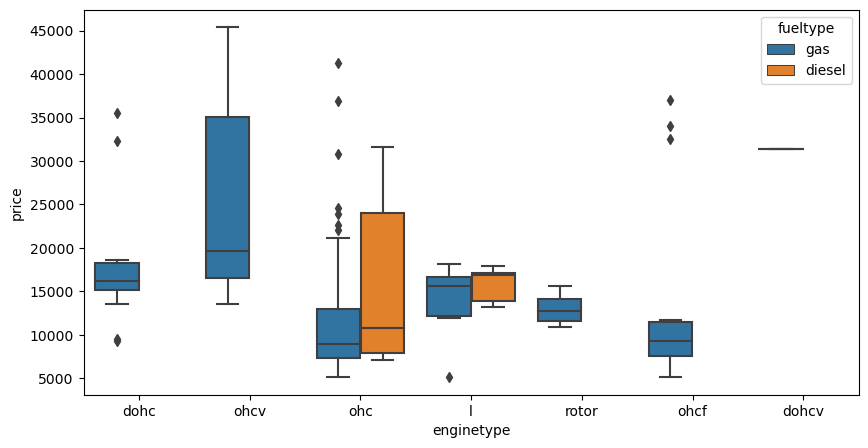

In [28]:
#Plotting boxplot for enginetypes vs price on fueltypes
plt.figure(figsize=(10,5))
sns.boxplot(x='enginetype', y='price', hue = 'fueltype', data=df)
plt.show()

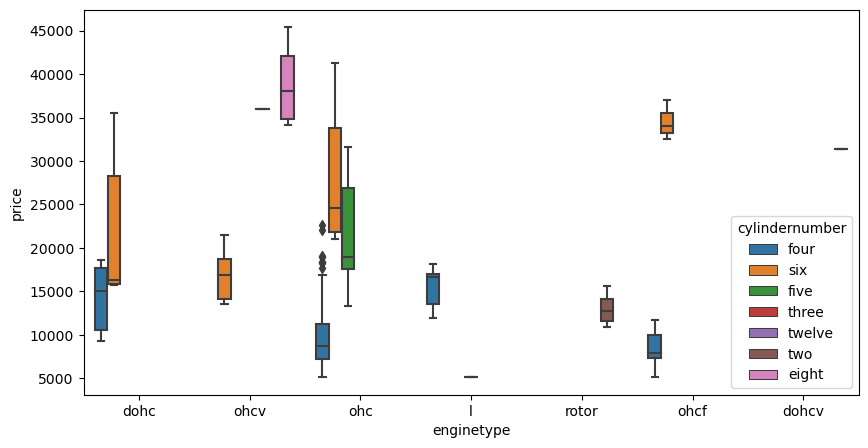

In [29]:
#Plotting boxplot for price vs enginetype based on cylindernumber
plt.figure(figsize=(10,5))
sns.boxplot(x='enginetype', y='price', hue = 'cylindernumber', data=df)
plt.show()

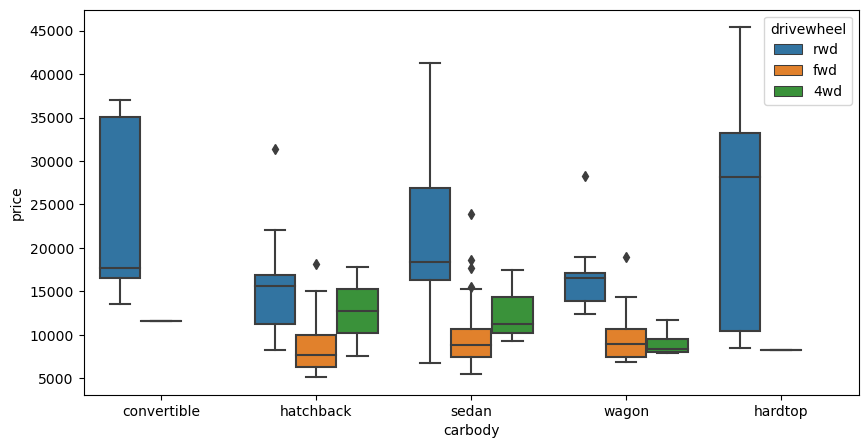

In [30]:
#Plotting boxplot for price vs carbody on drivewheel
plt.figure(figsize=(10,5))
sns.boxplot(x='carbody', y='price', hue = 'drivewheel', data=df)
plt.show()

So far we have visualized the data based on relationship between numerical variables vs price and categorical variables vs price and inferred the correlations among them.

#### Treating outliers

Since Outliers affect linear regression, it is important to treat outliers first before modelling.

In [31]:
#Function to plot the distribution plot of the numeric variable list
def plot_dist(var_list):

    plt.figure(figsize=(25, 20))
    for var in var_list:
        plt.subplot(3,5,var_list.index(var)+1)
        sns.distplot(df[var])
    plt.show()

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


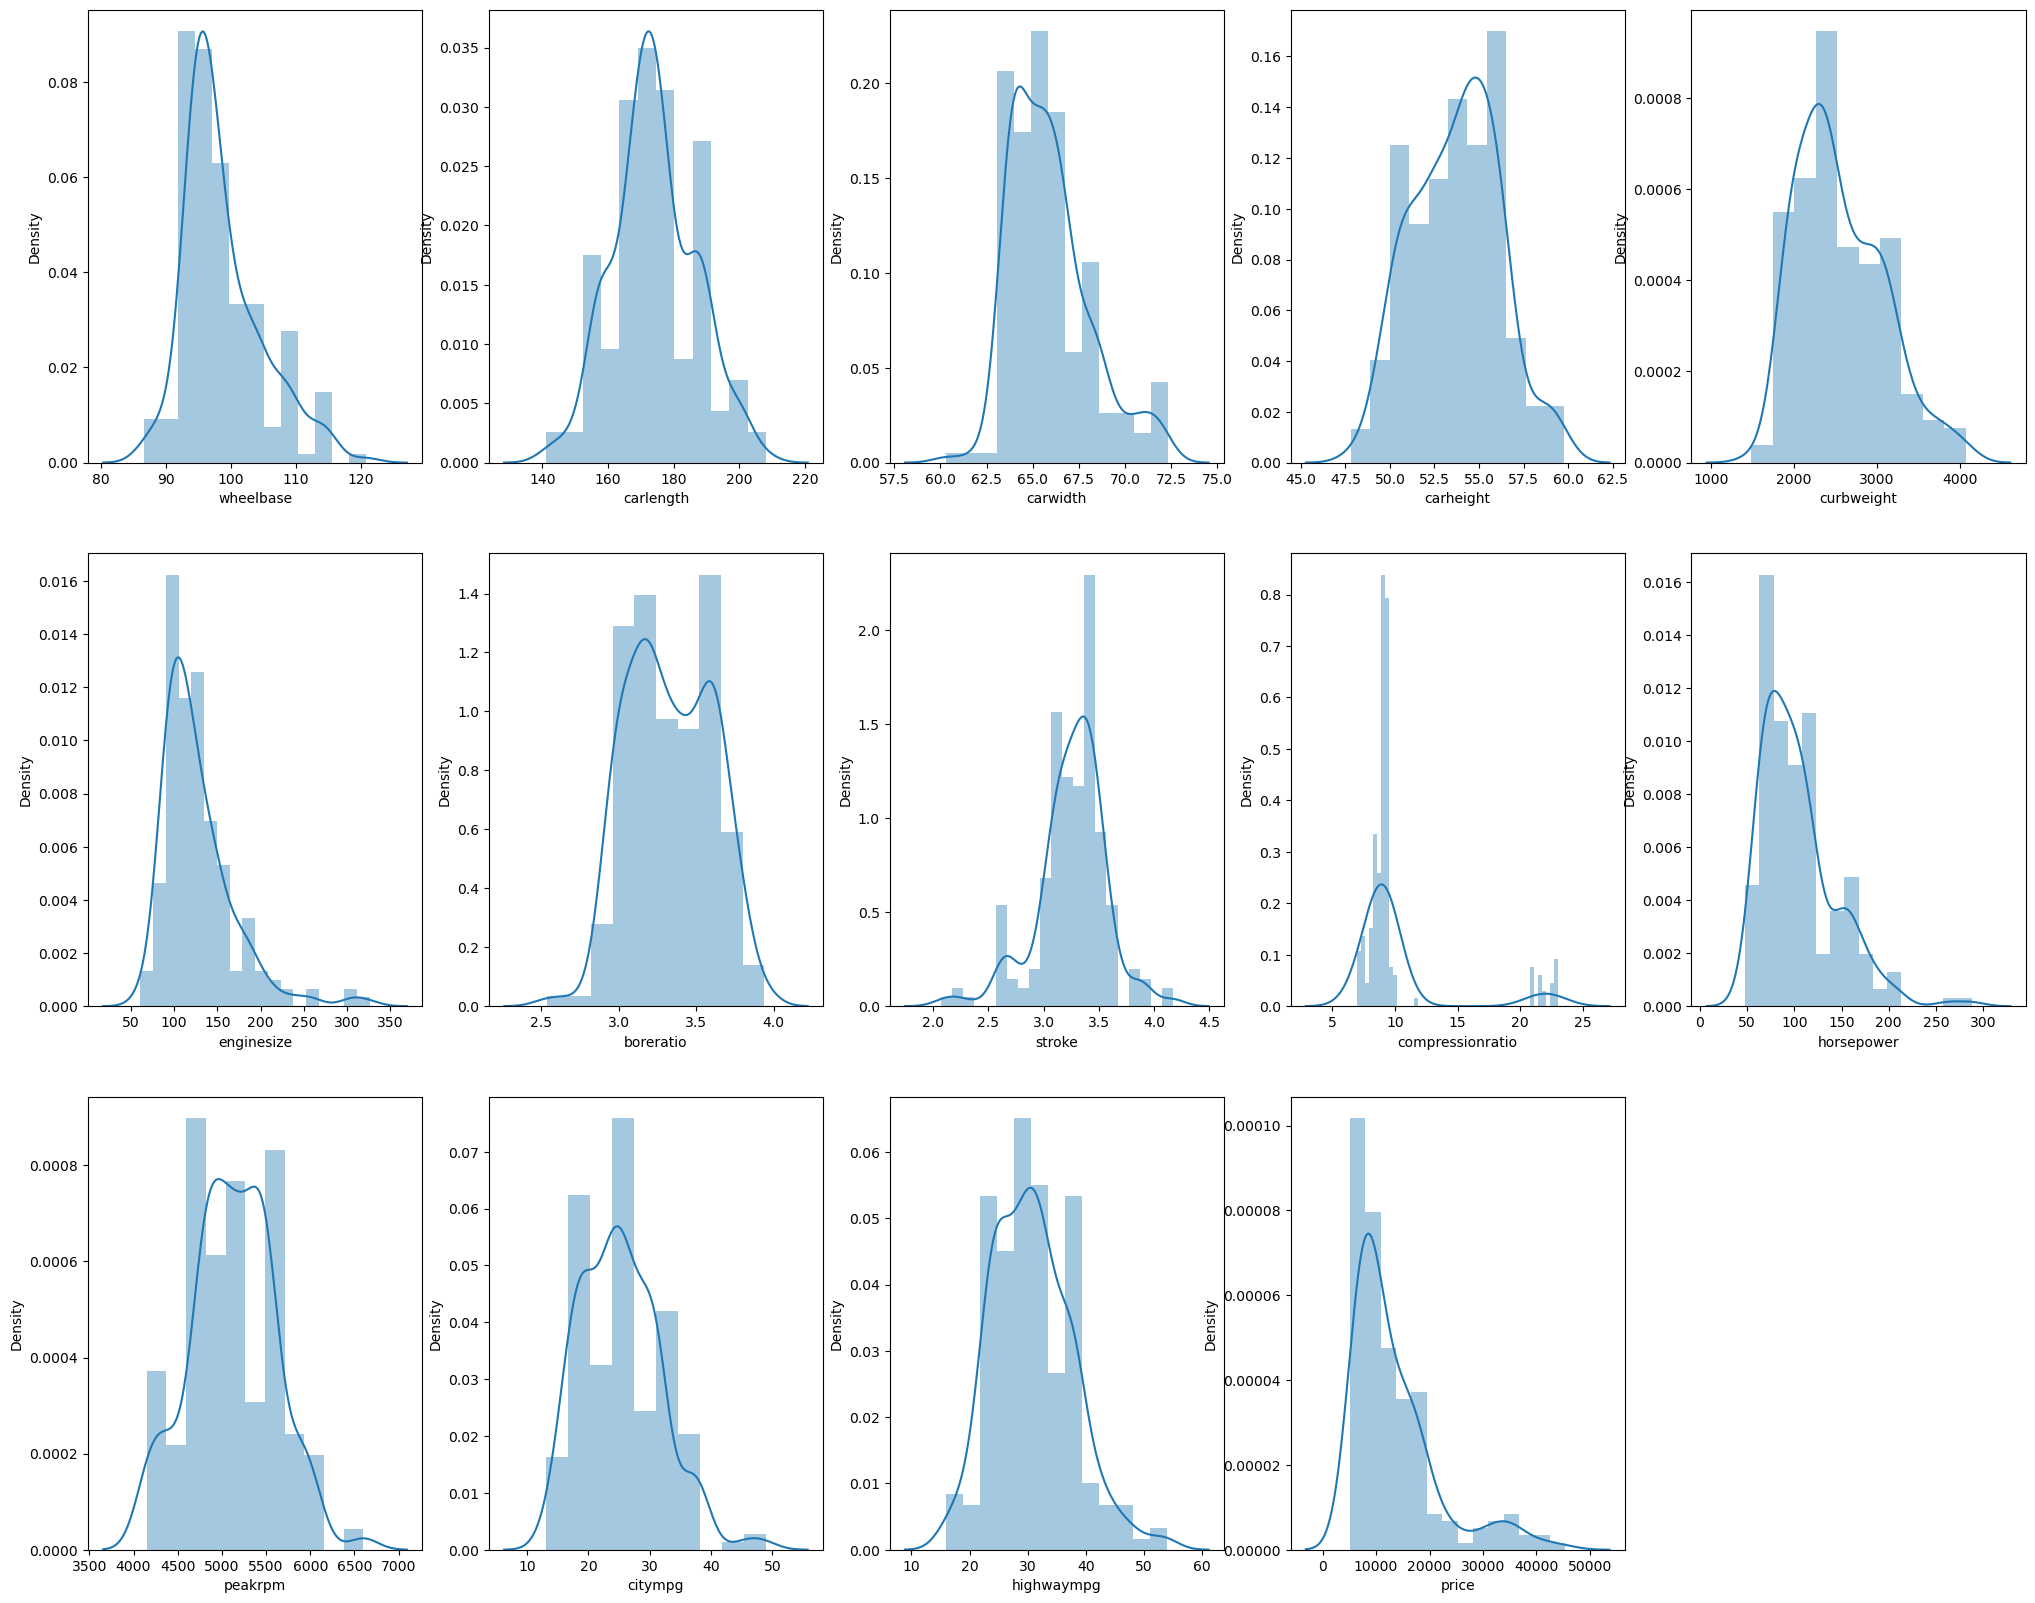

In [32]:
numeric_variables = list(df.columns[df.dtypes != 'object'])
print(numeric_variables)
plot_dist(numeric_variables)

It is inferred from the above distribution that some variables have outliers since some graph has right skewed distribution.Those variables are horsepower, enginesize, curbweight, compressionratio.

In [33]:
#Let's see the frequencies of the above said variables
print(df[['horsepower','curbweight','enginesize']].quantile([0.01, .96]))
print(df[['compressionratio']].quantile([0.01, .90]))

      horsepower  curbweight  enginesize
0.01       52.12     1819.72        70.0
0.96      182.00     3657.80       209.0
      compressionratio
0.01              7.00
0.90             10.94


The quantile ranges appear normal. We can clip the outliers part to 96 percentile and 90 percentile.

In [34]:
#Clipping outliers
df['horsepower'][np.abs(df['horsepower'] > 182.00)]= 182.00
df['horsepower'][np.abs(df['horsepower'] > 3657.80)]= 3657.80
df['enginesize'][np.abs(df['enginesize'] > 209.00)]= 209.00
df['compressionratio'][np.abs(df['compressionratio']>10.94)]=10.94

In [35]:
df= df[np.abs(df.price-df.price.mean()) <= (3*df.price.std())]

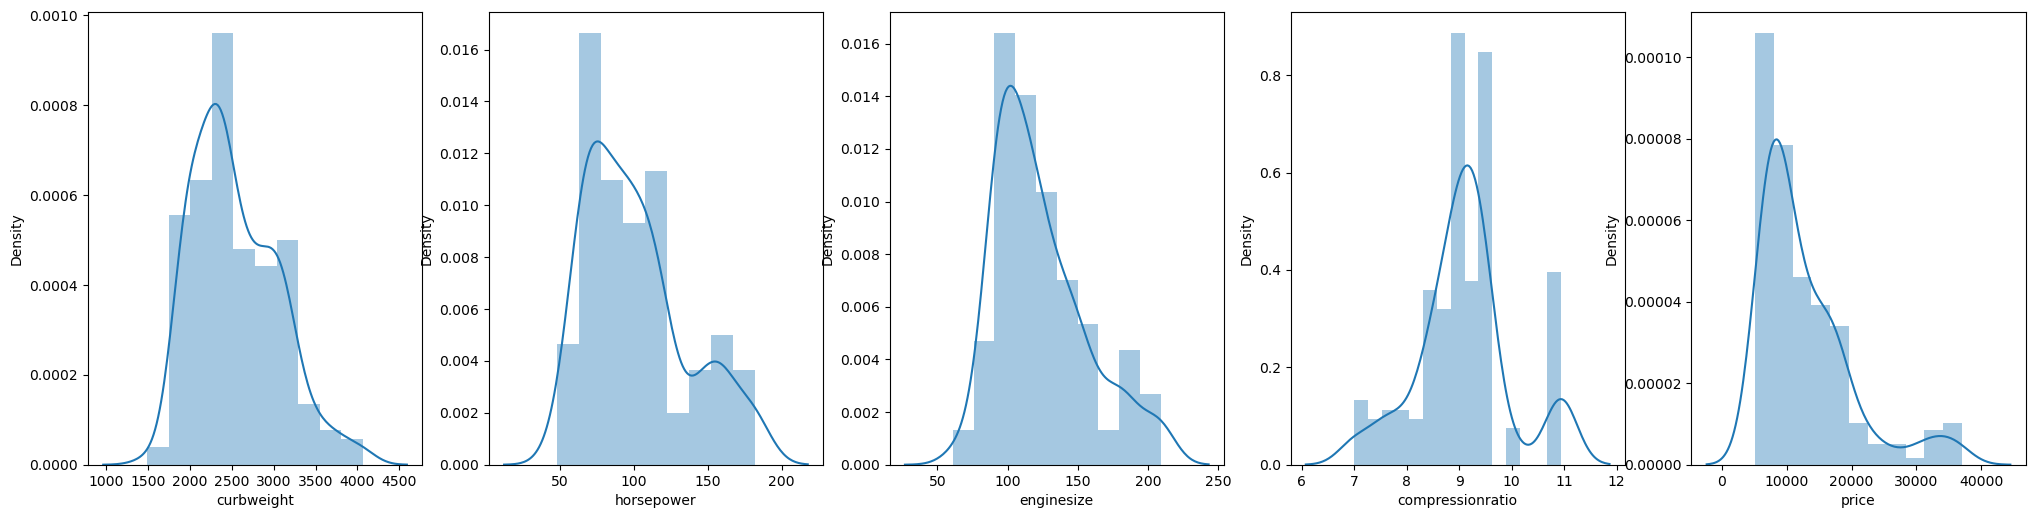

In [36]:
plot_dist(['curbweight','horsepower','enginesize','compressionratio','price'])

Now the distribution looks normal.

There was high correlation between carlength, wheelbase, carwidth, car weight, citympg, highwaympg.To reduce multicollinearity, lets create new variables.

In [37]:
#Creating new variables
# Creating carLWratio
df['carLWratio'] = df.carlength/df.carwidth
# Creating carWHratio
df['carWHratio'] = df.carwidth/df.carheight
# Creating PWratio
df['PWratio'] = df.horsepower/df.curbweight
# Creating HCmpgratio
df['HCmpgratio'] = df.highwaympg/df.citympg
# droping the orignal variables
df.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)

We saw that carcompany affects the price of cars.So, we can categorize them as lowtier, midtier and hightier cars under company_segment categorical variable.

#### lowtier
 if mean price of car_company is below 10,000
#### midtier
 if mean price of car_company between 10,000 and 20,000
#### hightier 
 if mean price of car_company is above 20,000

In [38]:
df.groupby('car_company').price.mean().sort_values(ascending=False)

car_company
jaguar         34600.000000
porsche        31400.500000
buick          30469.333333
bmw            23947.857143
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

In [39]:
company_segment_dict = {
    'cheverolet' : 'lowtier',
    'dodge' : 'lowtier',
    'plymouth' : 'lowtier',
    'honda' : 'lowtier',
    'subaru' : 'lowtier',
    'isuzu' : 'lowtier',
    'mitsubishi' : 'lowtier',
    'renault' : 'lowtier',
    'toyota' : 'lowtier',
    'volkswagen' : 'midtier',
    'nissan' : 'midtier',
    'mazda' : 'midtier',
    'saab' : 'midtier',
    'peugeot' : 'midtier',
    'alfa-romero' : 'midtier',
    'mercury' : 'midtier',
    'audi' : 'midtier',
    'volvo' : 'midtier',
    'bmw' : 'hightier',
    'buick' : 'hightier',
    'porsche' : 'hightier',
    'jaguar' : 'hightier',
    }
df['company_segment'] = df['car_company'].map(company_segment_dict)
# Dropping the orignal car_company variable
df.drop('car_company',axis=1,inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,stroke,compressionratio,horsepower,peakrpm,price,carLWratio,carWHratio,PWratio,HCmpgratio,company_segment
0,risky,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714,midtier
1,risky,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714,midtier
2,moderate,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,...,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421,midtier
3,risky,gas,std,four,sedan,fwd,front,99.8,2337,ohc,...,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000,midtier
4,risky,gas,std,four,sedan,4wd,front,99.4,2824,ohc,...,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222,midtier


In [40]:
df.groupby('company_segment').price.mean()

company_segment
hightier    29107.309524
lowtier      8987.369565
midtier     13231.839151
Name: price, dtype: float64

#### Handling categorical variable for linear regression

For modelling, we need to convert our categorical variables into 0 or 1. Inorder to convert them, we have to create dummy variables.

In [41]:
# Converting categorical variables with two levels to either 1 or 0
df['fueltype'] = df['fueltype'].map({'gas': 1, 'diesel': 0})
df['aspiration'] = df['aspiration'].map({'std': 1, 'turbo': 0})
df['doornumber'] = df['doornumber'].map({'two': 1, 'four': 0})
df['enginelocation'] = df['enginelocation'].map({'front': 1, 'rear': 0})
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,stroke,compressionratio,horsepower,peakrpm,price,carLWratio,carWHratio,PWratio,HCmpgratio,company_segment
0,risky,1,1,1,convertible,rwd,1,88.6,2548,dohc,...,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714,midtier
1,risky,1,1,1,convertible,rwd,1,88.6,2548,dohc,...,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714,midtier
2,moderate,1,1,1,hatchback,rwd,1,94.5,2823,ohcv,...,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421,midtier
3,risky,1,1,0,sedan,fwd,1,99.8,2337,ohc,...,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000,midtier
4,risky,1,1,0,sedan,4wd,1,99.4,2824,ohc,...,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222,midtier


In [42]:
# Creating dummy variables
df = pd.get_dummies(df)
# Droping 1 dummy variable and Keeping n-1 varaibles for each feature
df.drop(['symboling_risky',
         'carbody_hatchback',
         'drivewheel_4wd',
         'enginetype_l',
         'cylindernumber_three',
         'fuelsystem_1bbl',
         'company_segment_lowtier'],axis=1,inplace=True)
df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'carLWratio', 'carWHratio', 'PWratio',
       'HCmpgratio', 'symboling_moderate', 'symboling_safe',
       'carbody_convertible', 'carbody_hardtop', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'company_segment_hightier', 'company_segment_midtier'],
      dtype='object')

#### Train-Test split method using SKlearn 

In [43]:
#importing libraries for train-test split
from sklearn.model_selection import train_test_split

In [44]:
#Splitting the data into training set and testing set
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [45]:
#Importing minmaxscalar from sklearn library
from sklearn.preprocessing import MinMaxScaler

In [46]:
# Using MinMaxScaler to scale all the numeric variables in the same scale between 0 and 1.
scaler = MinMaxScaler()

In [47]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','carLWratio','carWHratio','PWratio','HCmpgratio','stroke','compressionratio','peakrpm','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_hightier,company_segment_midtier
1,1,1,1,1,0.068966,0.411171,0.466216,0.664286,0.290476,0.507614,...,0,0,0,0,0,1,0,0,0,1
165,1,1,1,1,0.272414,0.301396,0.250000,0.500000,0.480952,0.609137,...,0,0,0,0,0,1,0,0,0,0
197,1,1,0,1,0.610345,0.602793,0.540541,0.885714,0.514286,0.634518,...,0,0,0,0,0,1,0,0,0,1
169,1,1,1,1,0.406897,0.412335,0.574324,0.771429,0.680952,0.583756,...,0,0,0,0,0,1,0,0,0,0
190,1,1,1,1,0.272414,0.284329,0.324324,0.464286,0.633333,0.380711,...,0,0,0,0,0,1,0,0,0,1


In [48]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_hightier,company_segment_midtier
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,141.000000,141.000000,141.000000,141.000000,141.0,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.886525,0.794326,0.439716,0.985816,0.413402,0.411779,0.420979,0.559980,0.551570,0.536415,...,0.028369,0.333333,0.021277,0.113475,0.0,0.425532,0.042553,0.007092,0.106383,0.468085
std,0.318304,0.405634,0.498122,0.118672,0.198892,0.198452,0.225970,0.192528,0.150278,0.229812,...,0.166616,0.473085,0.144819,0.318304,0.0,0.496186,0.202567,0.084215,0.309426,0.500759
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.254849,0.243243,0.421429,0.490476,0.406091,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.358621,0.359193,0.337838,0.550000,0.571429,0.507614,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.552366,0.540541,0.742857,0.633333,0.609137,...,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### x set and y set for model building

In [49]:
y_train = df_train.pop('price')
X_train = df_train

### Building our model

We will use Sklearn for its compatibilty with RFE and then statsmodel for statistics analysis of the model. we are using mixed approach.

### 1)RFE

Recursive feature elimination

In [50]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [52]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE and selecting 15 features best describing the price of cars
rfe = RFE(lm,n_features_to_select= 15)            
rfe = rfe.fit(X_train, y_train)

In [53]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 10),
 ('aspiration', False, 9),
 ('doornumber', False, 24),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('curbweight', False, 30),
 ('enginesize', False, 8),
 ('boreratio', False, 6),
 ('stroke', True, 1),
 ('compressionratio', False, 11),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('carLWratio', True, 1),
 ('carWHratio', True, 1),
 ('PWratio', True, 1),
 ('HCmpgratio', False, 22),
 ('symboling_moderate', False, 28),
 ('symboling_safe', False, 27),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 21),
 ('carbody_sedan', False, 17),
 ('carbody_wagon', False, 25),
 ('drivewheel_fwd', False, 29),
 ('drivewheel_rwd', False, 26),
 ('enginetype_dohc', False, 3),
 ('enginetype_dohcv', False, 2),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 4),
 ('enginetype_ohcv', False, 12),
 ('enginetype_rotor', False, 18),
 ('cylindernumber_eight', False, 13),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylinder

In [54]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'stroke', 'horsepower', 'peakrpm',
       'carLWratio', 'carWHratio', 'PWratio', 'carbody_convertible',
       'enginetype_ohc', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_4bbl', 'company_segment_hightier'],
      dtype='object')

In [55]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'curbweight', 'enginesize',
       'boreratio', 'compressionratio', 'HCmpgratio', 'symboling_moderate',
       'symboling_safe', 'carbody_hardtop', 'carbody_sedan', 'carbody_wagon',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'company_segment_midtier'],
      dtype='object')

### 2)Statsmodel

Using statsmodel for detailed statistics

In [ ]:
import statsmodels.api as sm
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### Customised functions for model fitting

Importing statmodel package

In [61]:
import statsmodels.api as sm

In [62]:
#Function to fit the linear regression model from the statmodel package
# Creating X_train dataframe with the selected variables
# Adding a constant variable
def fit_LRM(X_train):
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train).fit()
    print(lm.summary())
    return lm

In [63]:
lm=fit_LRM(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     173.0
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           6.66e-76
Time:                        15:39:14   Log-Likelihood:                 225.25
No. Observations:                 141   AIC:                            -418.5
Df Residuals:                     125   BIC:                            -371.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

There are features that has p-value>0.05, then those variables are not statistically significant.

Those features are fuelsystem_4bbl, cylindernumber_five, cylindernumber_six, carLWratio.

In [64]:
X_train1 = X_train_rfe.drop('fuelsystem_4bbl', axis=1)

In [65]:
lm1=fit_LRM(X_train1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     184.9
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           8.94e-77
Time:                        15:52:13   Log-Likelihood:                 224.55
No. Observations:                 141   AIC:                            -419.1
Df Residuals:                     126   BIC:                            -374.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [66]:
X_train2 = X_train1.drop('cylindernumber_five', axis=1)

In [67]:
lm2=fit_LRM(X_train2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     198.3
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           1.28e-77
Time:                        15:53:21   Log-Likelihood:                 223.74
No. Observations:                 141   AIC:                            -419.5
Df Residuals:                     127   BIC:                            -378.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [68]:
X_train3 = X_train2.drop('cylindernumber_six', axis=1)

In [69]:
lm3=fit_LRM(X_train3)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     215.5
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           1.14e-78
Time:                        16:01:05   Log-Likelihood:                 223.41
No. Observations:                 141   AIC:                            -420.8
Df Residuals:                     128   BIC:                            -382.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [70]:
X_train4 = X_train3.drop('carLWratio', axis=1)

In [71]:
lm4=fit_LRM(X_train4)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     231.6
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           2.88e-79
Time:                        16:15:55   Log-Likelihood:                 221.89
No. Observations:                 141   AIC:                            -419.8
Df Residuals:                     129   BIC:                            -384.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

 Check the VIF values of the feature variables.

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
# Calculate the VIFs for the new model
#Creating function for getVIF.
def getVIF(X_train):
    
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [81]:
getVIF(X_train4)

,Features,VIF
6,PWratio,64.08
3,horsepower,51.53
0,enginelocation,44.23
2,stroke,20.76
1,wheelbase,19.57
5,carWHratio,13.32
4,peakrpm,8.18
9,cylindernumber_four,8.00
8,enginetype_ohc,5.81
10,company_segment_hightier,1.90


<Axes: >

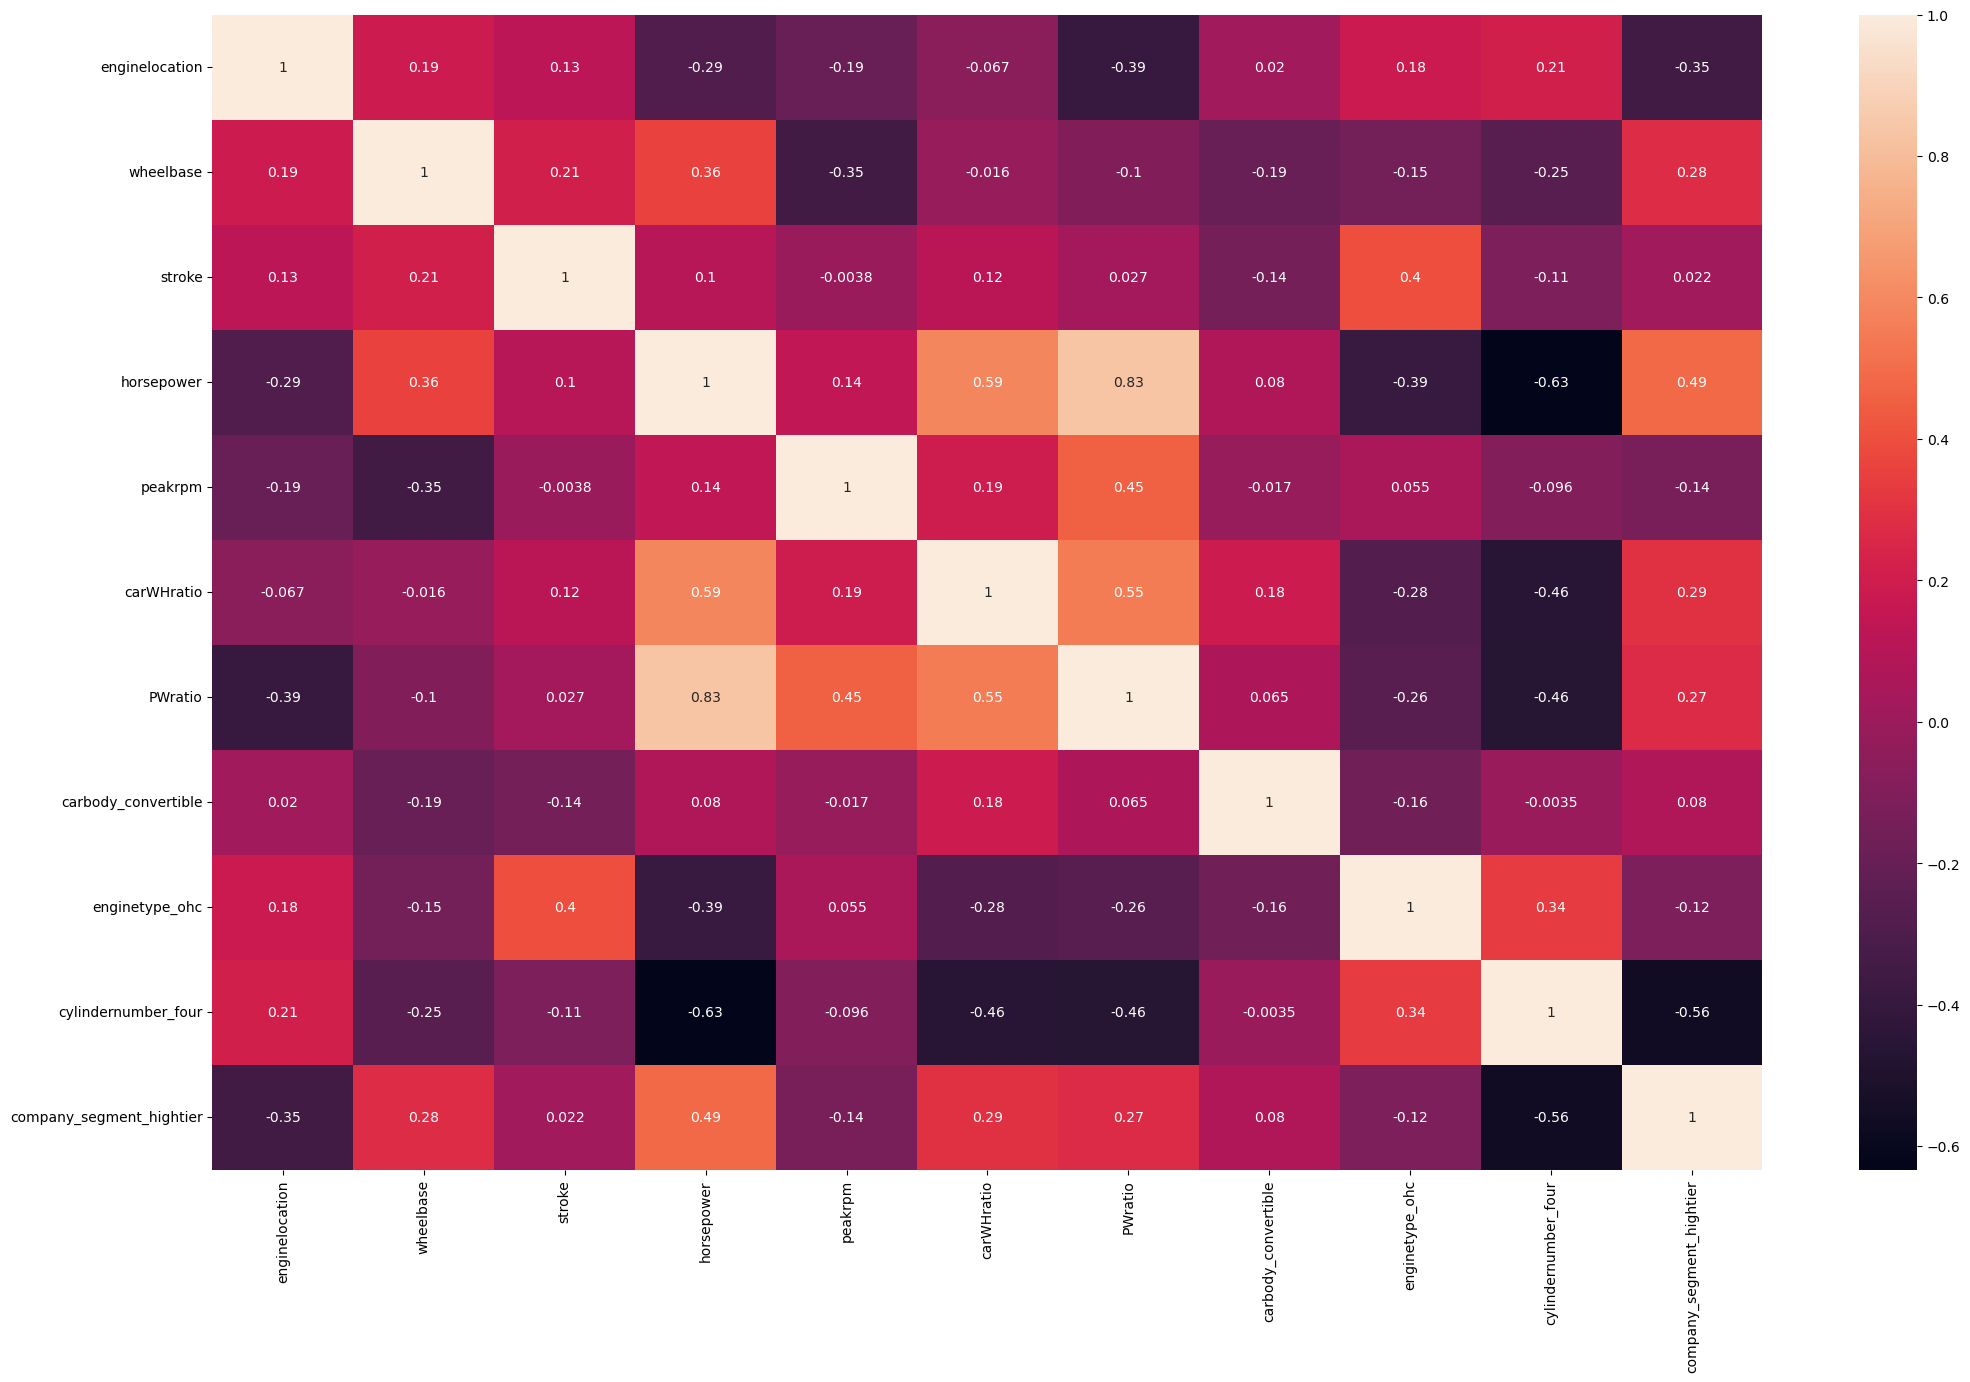

In [89]:
#Plotting heatmap for X-train4
plt.figure(figsize = (25,15))
sns.heatmap(X_train4.corr(),annot = True)

removing carLWratio had no impact on the Adj. R-Squared.
PWratio is having the highest VIF and is strongly corelated with horsepower, carWHratio and peakrpm. Let's remove this

In [90]:
X_train5 = X_train4.drop('PWratio', axis=1)

In [91]:
lm5=fit_LRM(X_train5)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     175.7
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           2.00e-70
Time:                        16:38:23   Log-Likelihood:                 196.68
No. Observations:                 141   AIC:                            -371.4
Df Residuals:                     130   BIC:                            -338.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [92]:
getVIF(X_train5)

,Features,VIF
0,enginelocation,38.13
2,stroke,20.64
5,carWHratio,13.21
1,wheelbase,10.90
3,horsepower,9.91
8,cylindernumber_four,7.29
4,peakrpm,6.08
7,enginetype_ohc,5.80
9,company_segment_hightier,1.90
6,carbody_convertible,1.20


<Axes: >

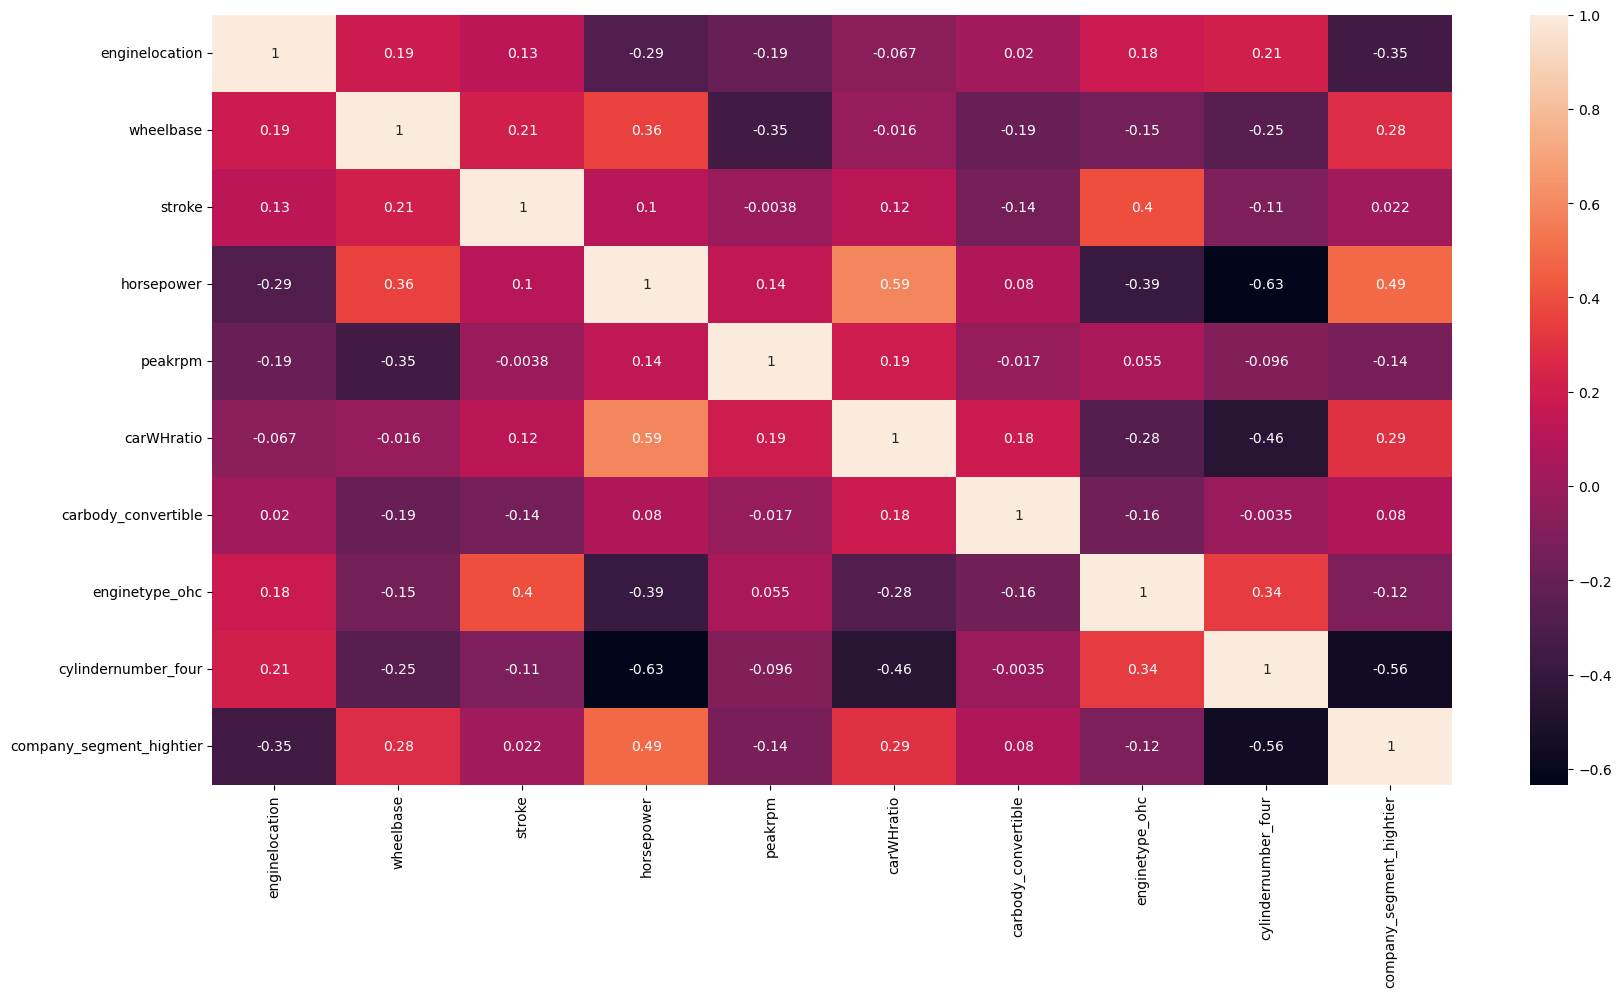

In [94]:
#Plotting heatmap for X_train5
plt.figure(figsize = (20,10))
sns.heatmap(X_train5.corr(),annot = True)

removing PWratio reduced the Adj. R-Squared to 0.926(not much)
peakrpm is having high p-value. Let's remove this

In [95]:
X_train6 = X_train5.drop('peakrpm', axis=1)

In [96]:
lm6=fit_LRM(X_train6)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     196.6
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           1.40e-71
Time:                        16:40:33   Log-Likelihood:                 196.67
No. Observations:                 141   AIC:                            -373.3
Df Residuals:                     131   BIC:                            -343.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Here we see that enginetype_ohc is having high p value.We can drop that

In [97]:
X_train7 = X_train6.drop('enginetype_ohc', axis=1)

In [98]:
lm7=fit_LRM(X_train7)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     217.7
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           3.82e-72
Time:                        16:44:51   Log-Likelihood:                 195.12
No. Observations:                 141   AIC:                            -372.2
Df Residuals:                     132   BIC:                            -345.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Then there is stroke with pvalue=0.178.Lets drop that.

In [99]:
X_train8 = X_train7.drop('stroke', axis=1)

In [100]:
lm8=fit_LRM(X_train8)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           5.81e-73
Time:                        16:46:05   Log-Likelihood:                 194.15
No. Observations:                 141   AIC:                            -372.3
Df Residuals:                     133   BIC:                            -348.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [101]:
getVIF(X_train8)

,Features,VIF
0,enginelocation,26.46
3,carWHratio,12.55
1,wheelbase,8.74
2,horsepower,8.37
5,cylindernumber_four,6.89
6,company_segment_hightier,1.72
4,carbody_convertible,1.13


Enginelocation has high VIF of 26.46

<Axes: >

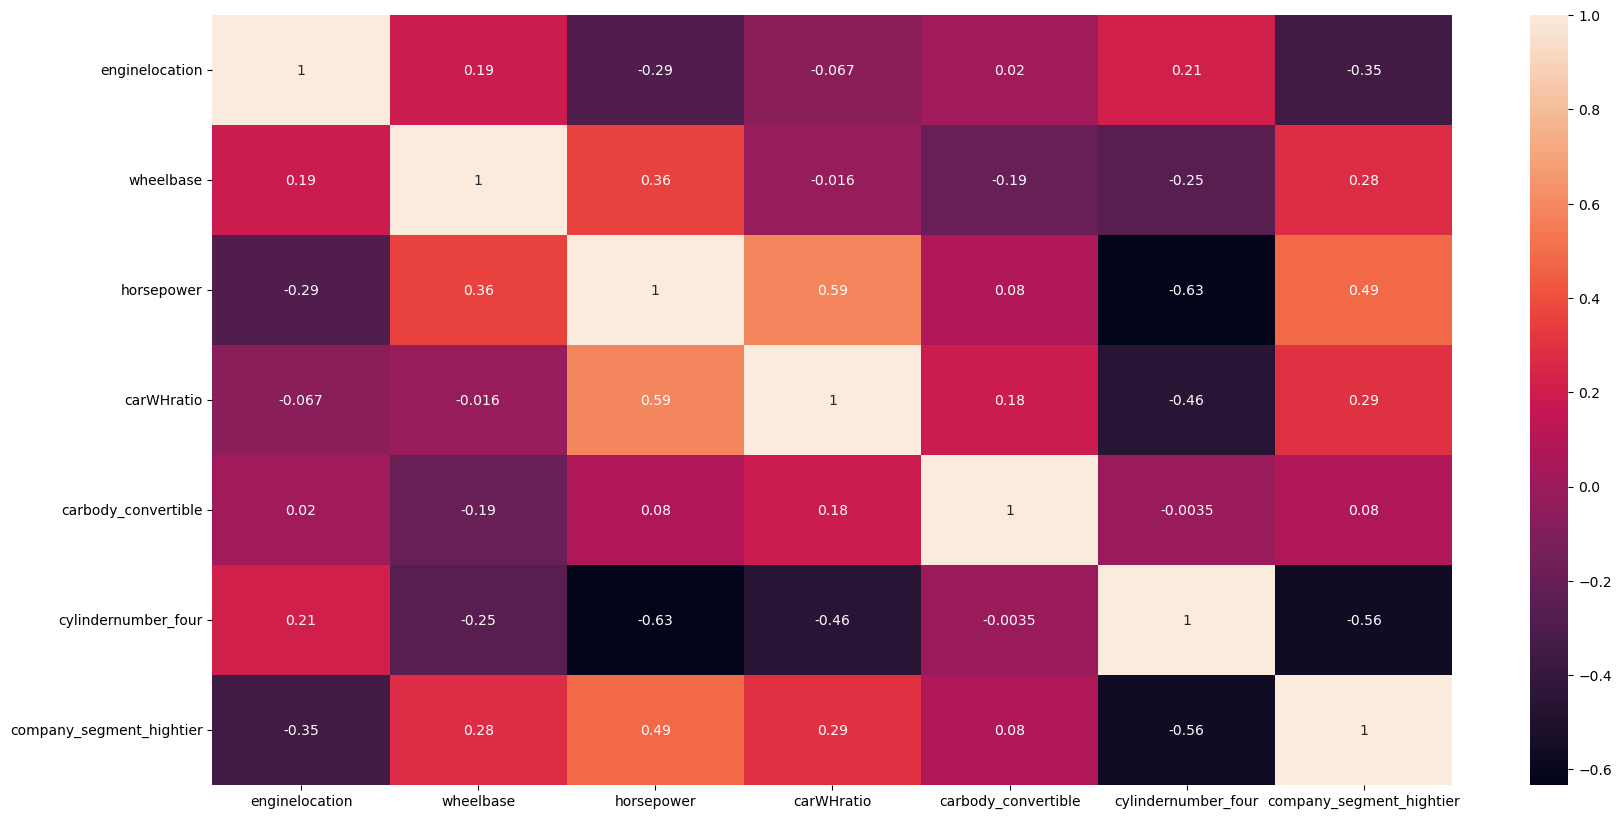

In [102]:
#PLotting heatmap for X_train8
plt.figure(figsize = (20,10))
sns.heatmap(X_train8.corr(),annot = True)

In [104]:
X_train9 = X_train8.drop('enginelocation', axis=1)

In [105]:
lm9=fit_LRM(X_train9)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     231.4
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           3.82e-68
Time:                        16:49:06   Log-Likelihood:                 179.41
No. Observations:                 141   AIC:                            -344.8
Df Residuals:                     134   BIC:                            -324.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [108]:
getVIF(X_train9)

,Features,VIF
1,horsepower,8.35
2,carWHratio,8.05
0,wheelbase,5.76
4,cylindernumber_four,3.63
5,company_segment_hightier,1.72
3,carbody_convertible,1.13


<Axes: >

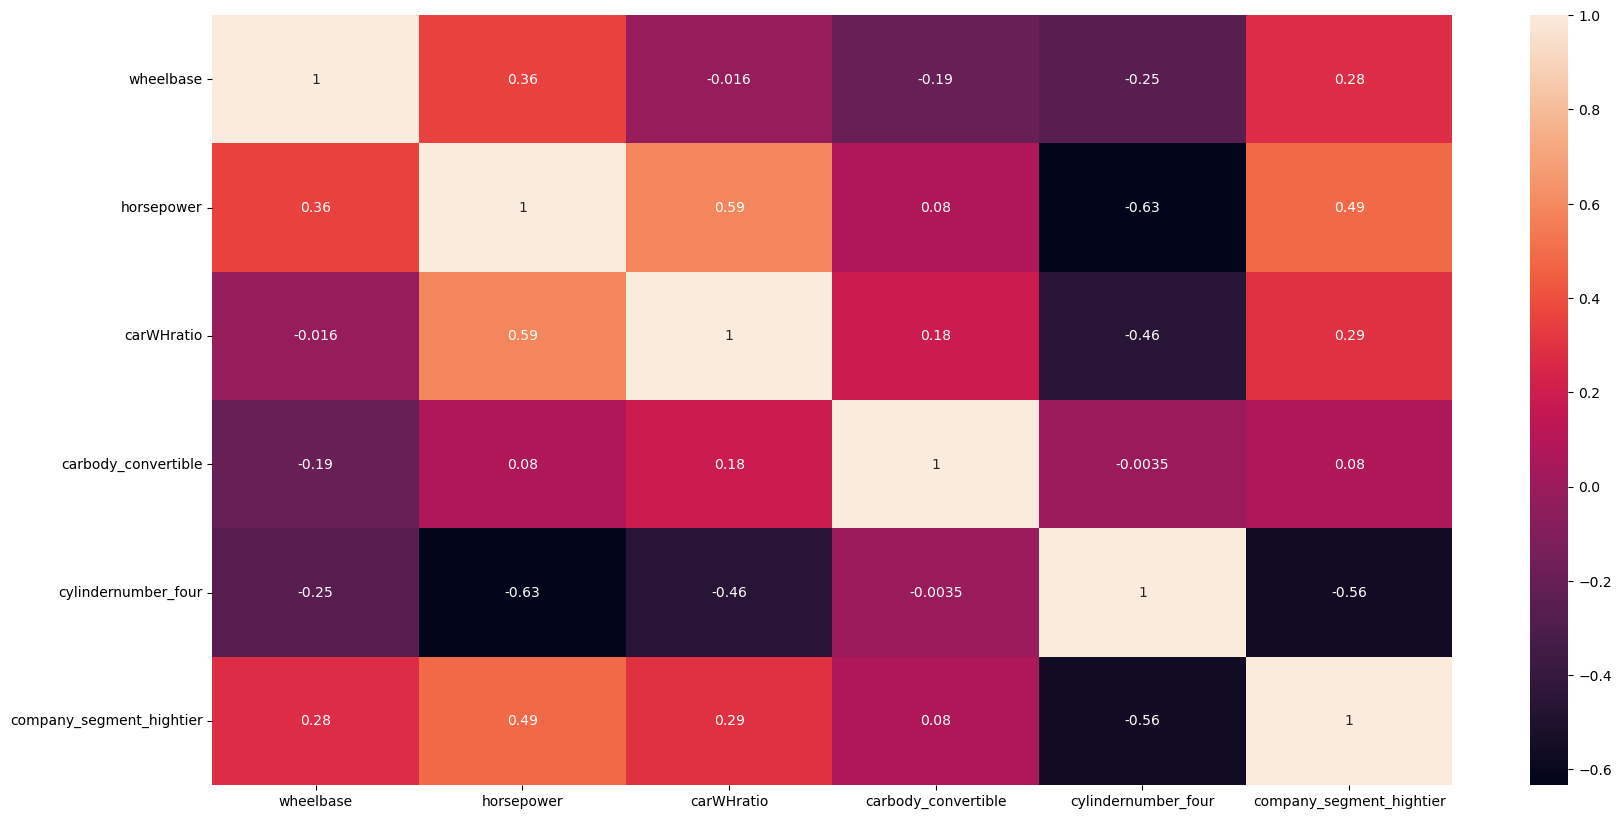

In [107]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train9.corr(),annot = True)

removing enginelocation lowers the Adj. R-Squared to 0.908. Still a significant fit.
Horsepower is more bussiness significant variable that carWHratio which also has a high VIF. carWHratio is correlated with horsepower. Let's remove carHWratio.

In [109]:
X_train10 = X_train9.drop('carWHratio', axis=1)
X_train10 = sm.add_constant(X_train10)
lm10 = sm.OLS(y_train,X_train10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     273.2
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           9.11e-69
Time:                        17:27:22   Log-Likelihood:                 177.91
No. Observations:                 141   AIC:                            -343.8
Df Residuals:                     135   BIC:                            -326.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [110]:
getVIF(X_train10)

,Features,VIF
0,const,19.89
4,cylindernumber_four,1.95
2,horsepower,1.89
5,company_segment_hightier,1.56
1,wheelbase,1.24
3,carbody_convertible,1.08


Now all the variables are in low VIF and Adj R square is 0.907 which is quite a good fit which proves that they are the final model predictor values.

#### Residual Analysis of training data

One of the major assumptions of linear regression is checking error terms whether they are normally distributed.

In [111]:
y_train_pred = lm10.predict(X_train10)

In [112]:
%matplotlib inline

Text(0.5, 0, 'Errors')

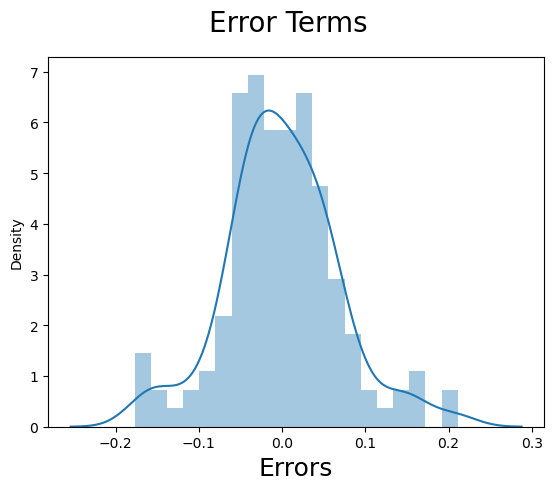

In [113]:
#Plotting histogram to check error items
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)                       

From the above graph, it is inferred that the graph shows almost normal districuted, but not centered properly,it is not centered exactly at zero, but close to it. We can see some error variance along the tails.

Now that we have final predictor variables and checked with error terms, We have to test them on test terms.

### Making predictions

#### Applying scaling on the test sets

In [114]:
num_vars=num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','carLWratio','carWHratio','PWratio','HCmpgratio','stroke','compressionratio','peakrpm','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

X_test and y_test creation

In [115]:
y_test = df_test.pop('price')
X_test = df_test

In [116]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_train10= X_train10.drop(['const'], axis=1)
X_test_new = X_test[X_train10.columns]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [117]:
# Making predictions
y_pred = lm10.predict(X_test_new)

### Model evaluation

Text(0, 0.5, 'y_pred')

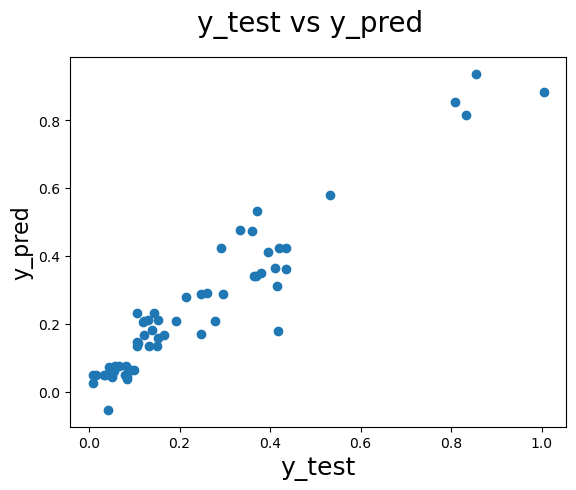

In [118]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 

From the scatterplot of y_test vs y_pred on the above graph,The spread of values look almost linear.

In [119]:
# Importing two metrics which are necessary to determine whether regression models are accurate or misleading.
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.06739242129331674
Model r2_score: 0.9056388935908384


SO the model's RMSE value is 0.067 and r2_score value is 0.905 which is close to Adj.R-Squared value.

### Final Inference

We have inferred from model evaluation, that variables with a low p-value,low VIF describe the price to a good extent.

| Predictor | Coef | p-value |
| --- | --- | --- |
| wheelbase | 0.3058 | 0.000 |
| horsepower | 0.3750 | 0.000 |
| carbody_convertible | 0.1785 | 0.000 |
| cylindernumber_four | -0.0686 | 0.001 |
| company_segment_hightier | 0.3129 | 0.000 |

#### Best fitted line equation:

**$ price = -0.0133 + 0.3058  \times  wheelbase + 0.3750 \times horsepower + 0.1785 \times carbody\_convertible - 0.0686 \times cylindernumber\_four + 0.3129 \times company\_segment\_hightier $**

-This equation implies how the price of the vehicle changes with a unit change in any of these independent variable with all other variables held constant.

-The predictor carbody_convertible suggest that the price of car increases by a factor of 0.1785 when the car body is convertible.

-The cylinder_number_four is the most commonly available feature in 77.6% of the car data in USA and since having 4 cylinder is attributed with relatively low price cars the coeffeciant for this variable is negative.

-The company name is also essential in determining the price the automobile. High tier companies names like, BMW, Buik, Porsche and Jaguar further adds up to the price by a factor of 0.3129

#### We could do betterlike these couple of options:

-Add new features (ground_area= carlength * carwidth, etc.)

-choosing another set of variables to get a more normal distribution of error terms or use more useful variables like PWratio inplace of horsepower.

-Build a non-linear model

The chinese company Geely Automotives entering the US market should consider average car prices in US, which is $13,000 approx.

Some of the predominant factors of variables from US market are,
-  **symboling:** moderate (0,1)
-  **Carbody:** Sedan
-  **fueltype:** gas
-  **aspiration:** standard
-  **doornumbers:** four
-  **drivewheel:** forward
-  **engine location:** front
-  **engine type:** ohc
-  **cylinderNumber:** four
-  **fuelSystem**: mpfi

These factors are used to make changes in design, features and car price.